## PCAしたデータを階層的クラスタリング
---
### Method: Euclidean distance or Cosine similarity

In [1]:
#Import library

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from typing import List

In [2]:
# Set Config
CONFIG = {
  "file": "PCAed_data.csv",
}

In [3]:
# Define Original Function
def plot_dendrogram(data:List[np.ndarray], index:List[str], title:List[str], single_fig_size=5):
  assert len(data) == len(title), 'Data and Title length must be same'
  sample = len(data)
  fig, axes = plt.subplots(1, sample, figsize=(single_fig_size*sample, single_fig_size))
  for i in range(sample):
    dendrogram(data[i], labels=index, ax=axes[i])
    axes[i].set(title=title[i]
               , xlabel='Sample'
               , ylabel='Threshold')
    axes[i].tick_params(labelsize=8)
  return fig

def plot_dendro_stats(data_dendro: List[np.ndarray], title:List[str], single_fig_size=5):
  assert len(data_dendro) == len(title), 'Data and Title length must be same'
  n_sample = len(data_dendro)
  fig, axes = plt.subplots(2, n_sample, figsize=(single_fig_size*n_sample, single_fig_size*2))
  
  for i, data in enumerate(data_dendro):
    n_data = data.shape[0]
    
    x = data[:,2]
    y1 = np.arange(n_data, 0, -1)
    y2 = n_data / y1
    
    axes[0, i].plot(x, y1, 'ko-')
    axes[0, i].set(title=title[i], ylabel='Num of Clusters')
    axes[1, i].plot(x, y2, 'ko-')
    axes[1, i].set(xlabel='Threshold', ylabel='Ave Cluster Size')
  return fig

In [4]:
#Load Data
df = pd.read_csv(CONFIG["file"], index_col=0)

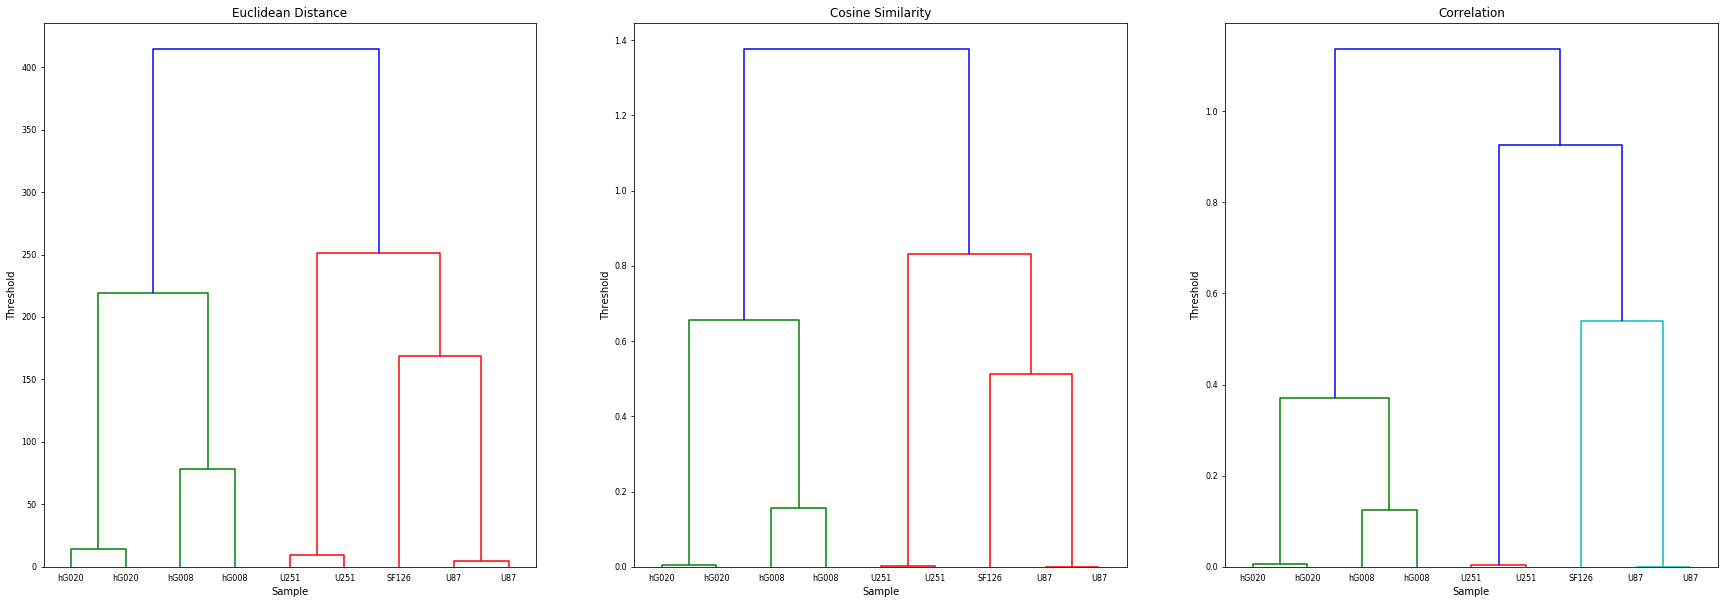

In [5]:
## Dendrogram
metrics = ['euclidean', 'cosine', 'correlation']
methods = ['ward', 'single', 'single']
titles = ['Euclidean Distance', 'Cosine Similarity', 'Correlation']

data_dendro = [linkage(df, metric=m1, method=m2) for m1, m2 in zip(metrics, methods)]
fig_dendrogram = plot_dendrogram(data=data_dendro, index=df.index, title=titles, single_fig_size=10)

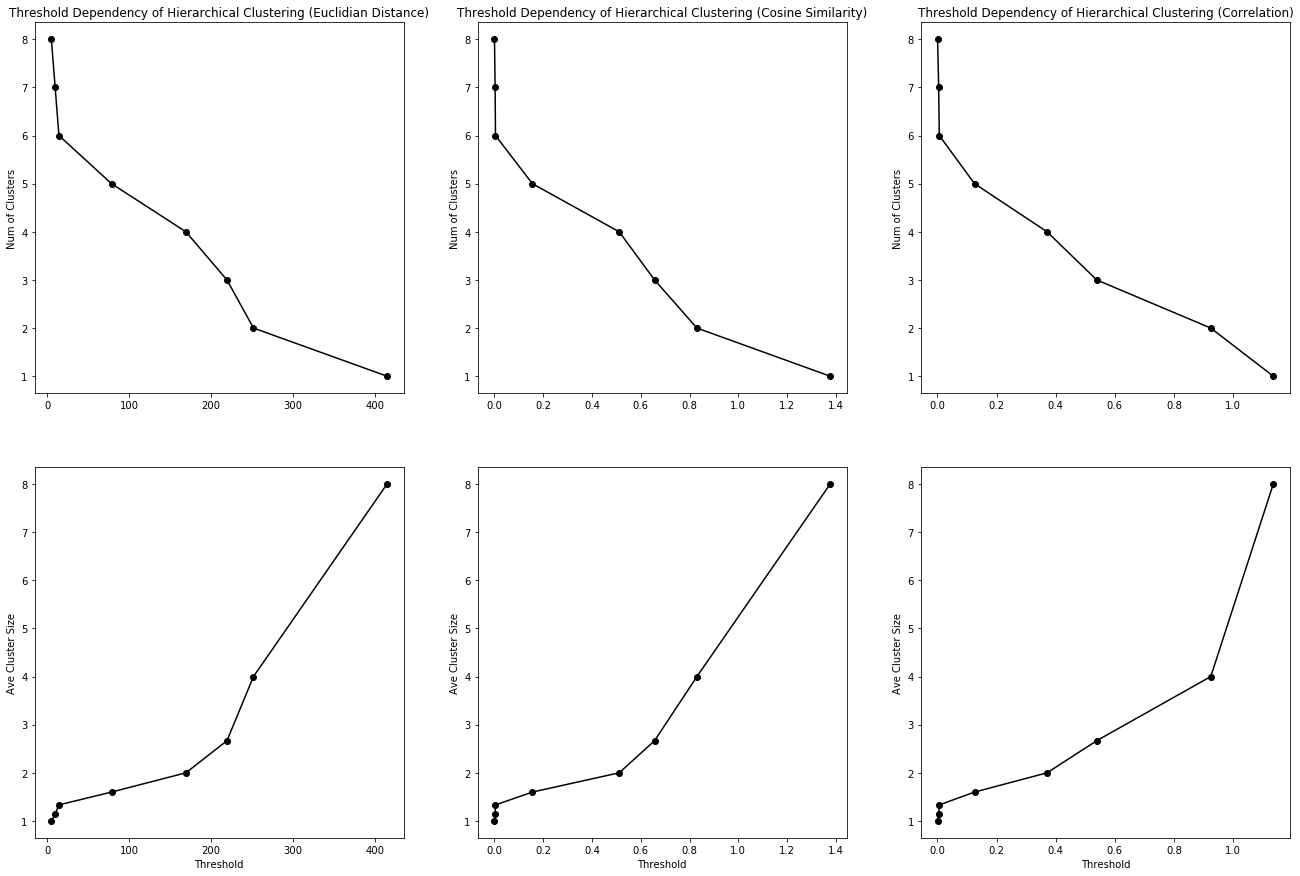

In [6]:
# Statistics
titles = ['Threshold Dependency of Hierarchical Clustering (Euclidian Distance)'
         , 'Threshold Dependency of Hierarchical Clustering (Cosine Similarity)'
         , 'Threshold Dependency of Hierarchical Clustering (Correlation)']

fig_dendro_stats = plot_dendro_stats(data_dendro, title=titles, single_fig_size=7.5)